# FLIGHT PRICE PREDICTION
Anyone who has booked a flight ticket knows how unexpectedly the prices vary. The cheapest 
available ticket on a given flight gets more and less expensive over time. This usually happens as 
an attempt to maximize revenue based on -
1. Time of purchase patterns (making sure last-minute purchases are expensive)
2. Keeping the flight as full as they want it (raising prices on a flight which is filling up in order 
to reduce sales and hold back inventory for those expensive last-minute expensive 
purchases)
So, you have to work on a project where you collect data of flight fares with other features and 
work to make a model to predict fares of flights.


In the given data set, I have fixed the departure location i.e Delhi. Also fixed the date 9th April 2022.
The different features involve, number of stop, destination, time of departure and time of arrival and duration of the flight.

From the given data set we will predict the price of a flight based on given feature.



# Data Analysis


In [155]:
import pandas as pd
import numpy as np
import seaborn as sns
import numpy
import matplotlib.pyplot as plt
%matplotlib inline

In [156]:
#loading data
data_flight = pd.read_csv ("C:/Users/Admin/Desktop/flight_result.csv")
data_flight

,Unnamed: 0,Unnamed: 0.1,airline,departure_city,departure_time,reaching_time,destination_city,journey_time,stop,ticket fare
0,0,0,Air India,DEL Indira Gandhi Intl,09:45,11:50,HYD Rajiv Gandhi Intl,2h 05m,direct,"₹ 4,510"
1,1,1,Air India,DEL Indira Gandhi Intl,09:45,11:50,HYD Rajiv Gandhi Intl,2h 05m,direct,"₹ 4,625"
2,2,2,SpiceJet,DEL Indira Gandhi Intl,21:55,00:15,HYD Rajiv Gandhi Intl,2h 20m,direct,"₹ 4,625"
3,3,3,Air India,DEL Indira Gandhi Intl,07:10,09:25,HYD Rajiv Gandhi Intl,2h 15m,direct,"₹ 4,510"
4,4,4,Vistara,DEL Indira Gandhi Intl,17:40,19:50,HYD Rajiv Gandhi Intl,2h 10m,direct,"₹ 4,376"
...,...,...,...,...,...,...,...,...,...,...
1497,964,964,Vistara,DEL Indira Gandhi Intl,14:45,18:55,AMD Ahmedabad,1h 35m,direct,"₹ 5,700"
1498,965,965,IndiGo,DEL Indira Gandhi Intl,06:25,08:05,AMD Ahmedabad,1h 35m,direct,"₹ 5,367"
1499,966,966,IndiGo,DEL Indira Gandhi Intl,19:00,06:25,AMD Ahmedabad,1h 40m,direct,"₹ 18,173"
1500,967,967,"Vistara, SpiceJet",DEL Indira Gandhi Intl,18:15,00:10,AMD Ahmedabad,1h 55m,direct,"₹ 18,173"


In [157]:
data_flight.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'airline', 'departure_city',
       'departure_time', 'reaching_time', 'destination_city', 'journey_time',
       'stop', 'ticket fare'],
      dtype='object')

In [158]:
data_flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1502 entries, 0 to 1501
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1502 non-null   int64 
 1   Unnamed: 0.1      1502 non-null   int64 
 2   airline           1502 non-null   object
 3   departure_city    1502 non-null   object
 4   departure_time    1502 non-null   object
 5   reaching_time     1502 non-null   object
 6   destination_city  1502 non-null   object
 7   journey_time      1502 non-null   object
 8   stop              1502 non-null   object
 9   ticket fare       1502 non-null   object
dtypes: int64(2), object(8)
memory usage: 117.5+ KB


In [159]:
data_flight.isnull().sum()

Unnamed: 0          0
Unnamed: 0.1        0
airline             0
departure_city      0
departure_time      0
reaching_time       0
destination_city    0
journey_time        0
stop                0
ticket fare         0
dtype: int64

In [160]:
data_flight[data_flight.duplicated()]

,Unnamed: 0,Unnamed: 0.1,airline,departure_city,departure_time,reaching_time,destination_city,journey_time,stop,ticket fare


In [161]:
data_flight.drop_duplicates(keep='first',inplace=True)

In [162]:
data_flight['airline'].value_counts()

IndiGo                   637
Vistara                  277
Air India                188
SpiceJet                 157
GoFirst                  122
AirAsia India            108
Vistara, IndiGo            6
Vistara, SpiceJet          4
AirAsia India, IndiGo      3
Name: airline, dtype: int64

In [163]:
data_flight['departure_city'].value_counts()

DEL Indira Gandhi Intl    1497
CCU Netaji S. Chandra        5
Name: departure_city, dtype: int64

In [164]:
data_flight['destination_city'].value_counts()

BLR Bengaluru Intl              339
GOI Goa Intl                    247
MAA Chennai                     246
AMD Ahmedabad                   196
TRV Thiruvananthapuram          187
CCU Netaji S. Chandra           138
HYD Rajiv Gandhi Intl            94
BOM Chhatrapati Shivaji Intl     55
Name: destination_city, dtype: int64

In [165]:
data_flight['stop'].value_counts()

direct    1315
1 stop     187
Name: stop, dtype: int64

In [166]:
data= data_flight.drop(['Unnamed: 0','Unnamed: 0.1' ], axis=1)

In [167]:
df=data.assign(ticket=data['ticket fare'].str.replace(r'₹', ''))

In [168]:
df1=df.assign(ticket1=df['ticket'].str.replace(r',', ''))

In [169]:
df1.head()

,airline,departure_city,departure_time,reaching_time,destination_city,journey_time,stop,ticket fare,ticket,ticket1
0,Air India,DEL Indira Gandhi Intl,09:45,11:50,HYD Rajiv Gandhi Intl,2h 05m,direct,"₹ 4,510","4,510",4510
1,Air India,DEL Indira Gandhi Intl,09:45,11:50,HYD Rajiv Gandhi Intl,2h 05m,direct,"₹ 4,625","4,625",4625
2,SpiceJet,DEL Indira Gandhi Intl,21:55,00:15,HYD Rajiv Gandhi Intl,2h 20m,direct,"₹ 4,625","4,625",4625
3,Air India,DEL Indira Gandhi Intl,07:10,09:25,HYD Rajiv Gandhi Intl,2h 15m,direct,"₹ 4,510","4,510",4510
4,Vistara,DEL Indira Gandhi Intl,17:40,19:50,HYD Rajiv Gandhi Intl,2h 10m,direct,"₹ 4,376","4,376",4376


In [170]:
type('ticket1')

str

In [171]:
df2= df1.drop(['ticket fare','ticket' ], axis=1)

In [172]:
df2["ticket1"] = df2["ticket1"].astype(str).astype(int)

No nan values in data set, so moving forward

In [173]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from math import sqrt
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

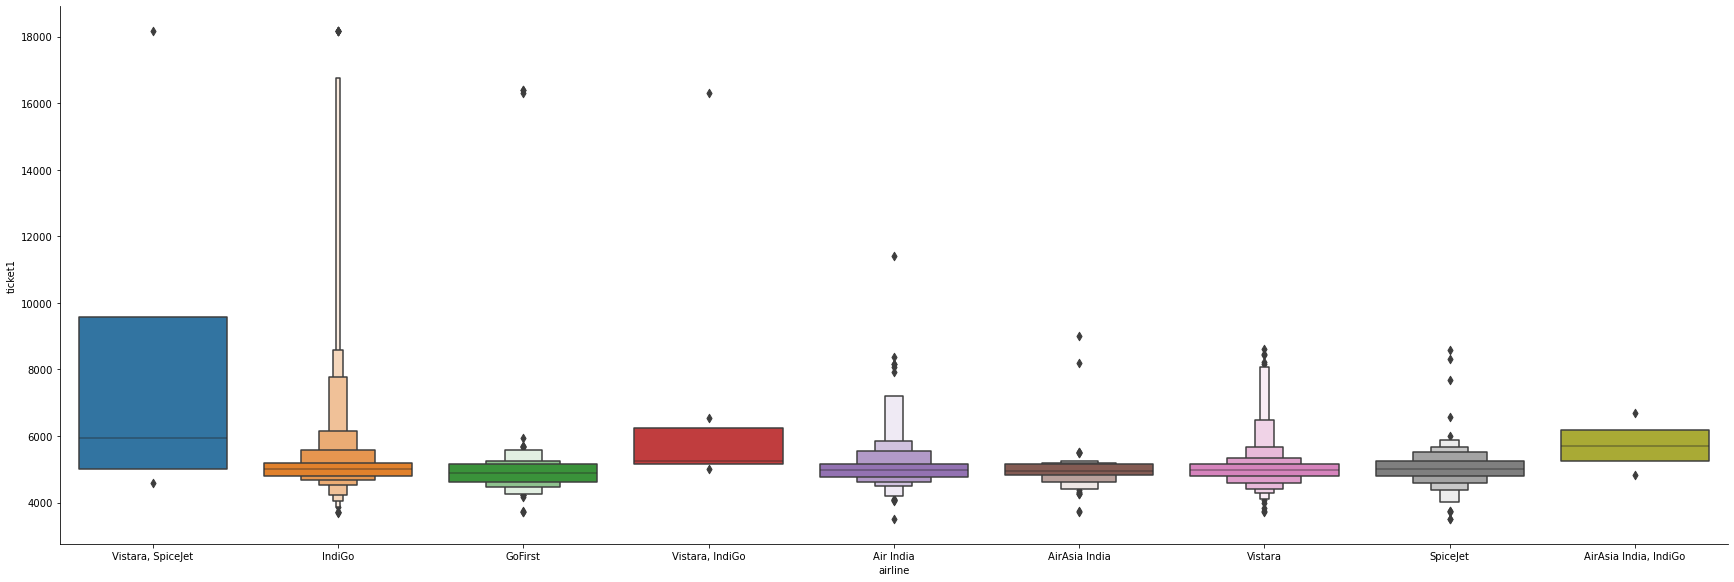

In [174]:
sns.catplot(y = "ticket1", x = "airline", data = df2.sort_values("ticket1", ascending = False),kind="boxen", height = 8, aspect = 3)
plt.show()

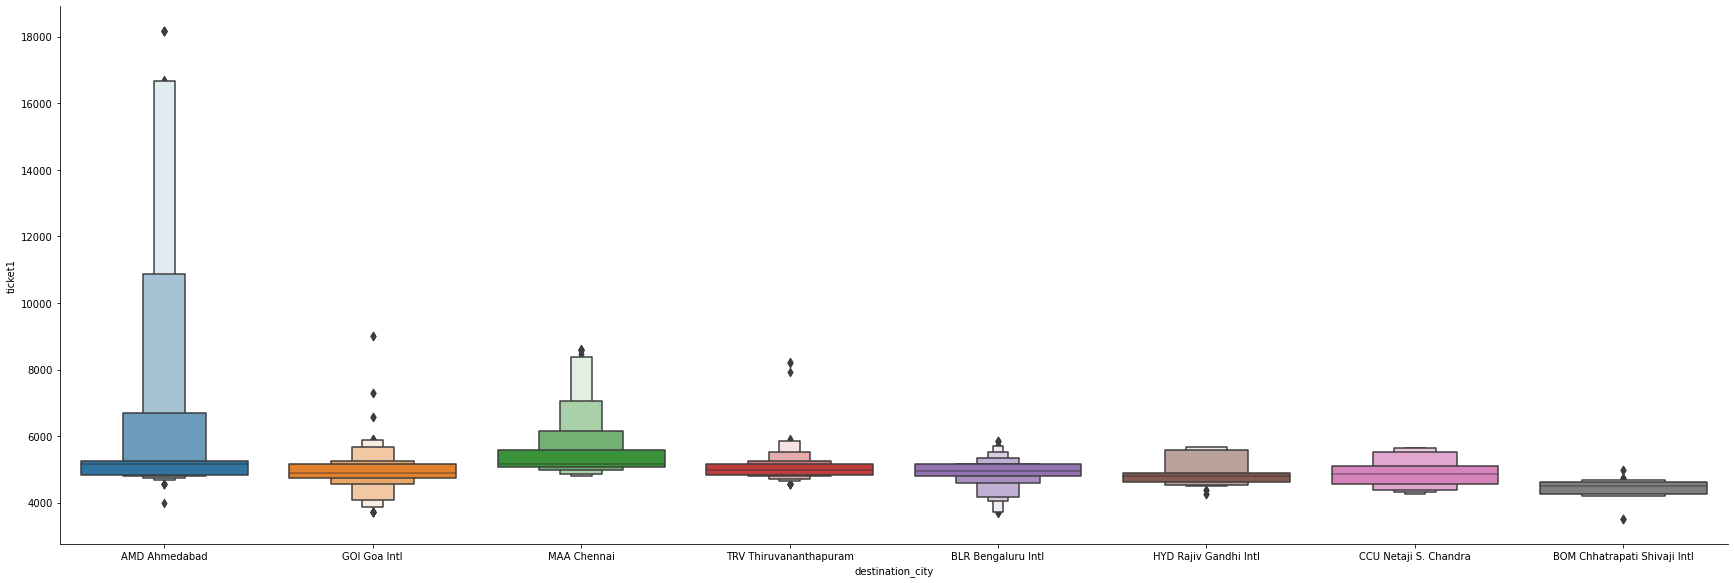

In [175]:
sns.catplot(y = "ticket1", x = "destination_city", data = df2.sort_values("ticket1", ascending = False),kind="boxen", height = 8, aspect = 3)
plt.show()

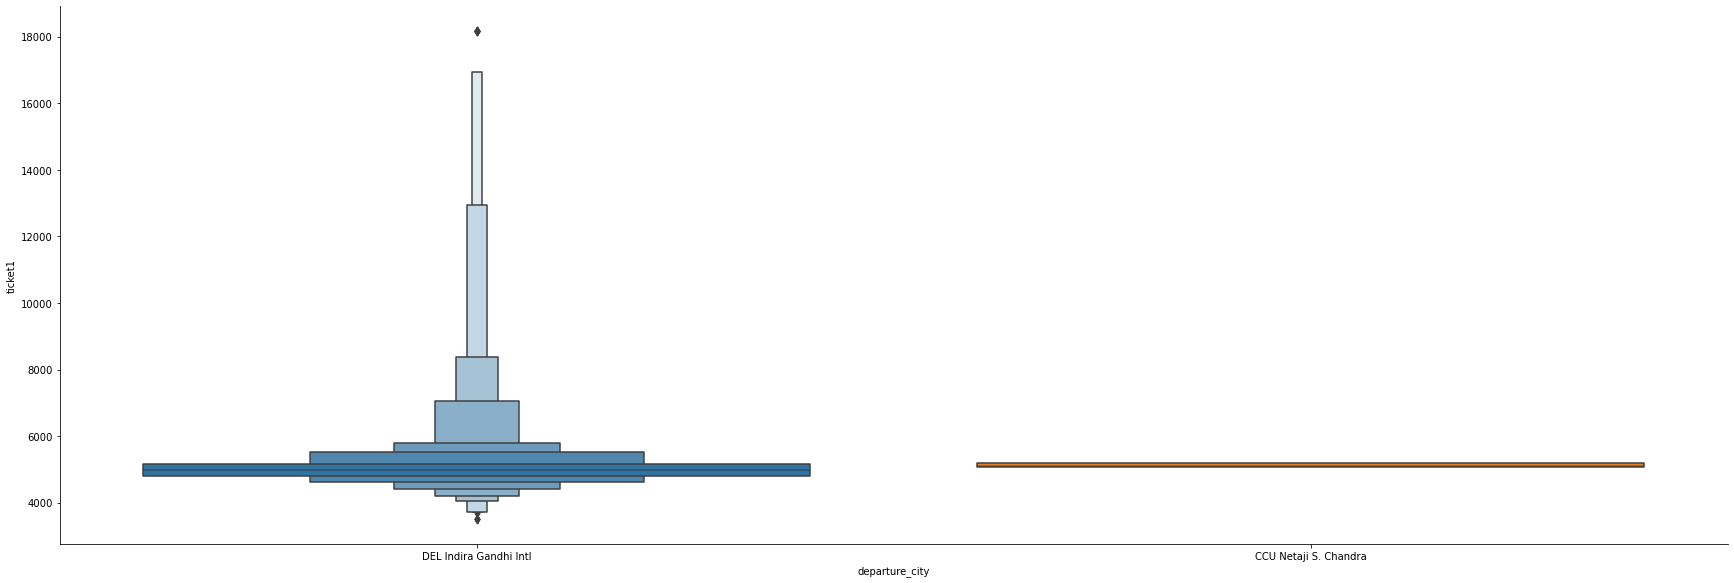

In [176]:
sns.catplot(y = "ticket1", x = "departure_city", data = df2.sort_values("ticket1", ascending = False),kind="boxen", height = 8, aspect = 3)
plt.show()

In [177]:
df2["departure_hr"] = pd.to_datetime(df2["departure_time"]).dt.hour
df2["departure_min"] = pd.to_datetime(df2["departure_time"]).dt.minute
df2.drop(["departure_time"], axis = 1, inplace = True)

In [178]:
df2["reaching_hr"] = pd.to_datetime(df2["reaching_time"]).dt.hour
df2["reaching_min"] = pd.to_datetime(df2["reaching_time"]).dt.minute
df2.drop(["reaching_time"], axis = 1, inplace = True)

In [179]:
df2.head()

,airline,departure_city,destination_city,journey_time,stop,ticket1,departure_hr,departure_min,reaching_hr,reaching_min
0,Air India,DEL Indira Gandhi Intl,HYD Rajiv Gandhi Intl,2h 05m,direct,4510,9,45,11,50
1,Air India,DEL Indira Gandhi Intl,HYD Rajiv Gandhi Intl,2h 05m,direct,4625,9,45,11,50
2,SpiceJet,DEL Indira Gandhi Intl,HYD Rajiv Gandhi Intl,2h 20m,direct,4625,21,55,0,15
3,Air India,DEL Indira Gandhi Intl,HYD Rajiv Gandhi Intl,2h 15m,direct,4510,7,10,9,25
4,Vistara,DEL Indira Gandhi Intl,HYD Rajiv Gandhi Intl,2h 10m,direct,4376,17,40,19,50


In [180]:
df2["journey_hr"]=pd.DataFrame(df2.journey_time.str.split(' ').str[0].tolist())
df2["journey_min"]=pd.DataFrame(df2.journey_time.str.split(' ').str[1].tolist())

In [181]:
df2

,airline,departure_city,destination_city,journey_time,stop,ticket1,departure_hr,departure_min,reaching_hr,reaching_min,journey_hr,journey_min
0,Air India,DEL Indira Gandhi Intl,HYD Rajiv Gandhi Intl,2h 05m,direct,4510,9,45,11,50,2h,05m
1,Air India,DEL Indira Gandhi Intl,HYD Rajiv Gandhi Intl,2h 05m,direct,4625,9,45,11,50,2h,05m
2,SpiceJet,DEL Indira Gandhi Intl,HYD Rajiv Gandhi Intl,2h 20m,direct,4625,21,55,0,15,2h,20m
3,Air India,DEL Indira Gandhi Intl,HYD Rajiv Gandhi Intl,2h 15m,direct,4510,7,10,9,25,2h,15m
4,Vistara,DEL Indira Gandhi Intl,HYD Rajiv Gandhi Intl,2h 10m,direct,4376,17,40,19,50,2h,10m
...,...,...,...,...,...,...,...,...,...,...,...,...
1497,Vistara,DEL Indira Gandhi Intl,AMD Ahmedabad,1h 35m,direct,5700,14,45,18,55,1h,35m
1498,IndiGo,DEL Indira Gandhi Intl,AMD Ahmedabad,1h 35m,direct,5367,6,25,8,5,1h,35m
1499,IndiGo,DEL Indira Gandhi Intl,AMD Ahmedabad,1h 40m,direct,18173,19,0,6,25,1h,40m
1500,"Vistara, SpiceJet",DEL Indira Gandhi Intl,AMD Ahmedabad,1h 55m,direct,18173,18,15,0,10,1h,55m


In [182]:
df2['journey_hr']=df2['journey_hr'].str.replace(r'h', '')
df2['journey_min']=df2['journey_min'].str.replace(r'm', '')

In [183]:
df2["journey_hr"] = df2["journey_hr"].astype(str).astype(int)
df2["journey_min"] = df2["journey_min"].astype(str).astype(int)

In [184]:
df2["total_journey"]=df2["journey_hr"]*60+df2["journey_min"]

In [185]:
df2

,airline,departure_city,destination_city,journey_time,stop,ticket1,departure_hr,departure_min,reaching_hr,reaching_min,journey_hr,journey_min,total_journey
0,Air India,DEL Indira Gandhi Intl,HYD Rajiv Gandhi Intl,2h 05m,direct,4510,9,45,11,50,2,5,125
1,Air India,DEL Indira Gandhi Intl,HYD Rajiv Gandhi Intl,2h 05m,direct,4625,9,45,11,50,2,5,125
2,SpiceJet,DEL Indira Gandhi Intl,HYD Rajiv Gandhi Intl,2h 20m,direct,4625,21,55,0,15,2,20,140
3,Air India,DEL Indira Gandhi Intl,HYD Rajiv Gandhi Intl,2h 15m,direct,4510,7,10,9,25,2,15,135
4,Vistara,DEL Indira Gandhi Intl,HYD Rajiv Gandhi Intl,2h 10m,direct,4376,17,40,19,50,2,10,130
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1497,Vistara,DEL Indira Gandhi Intl,AMD Ahmedabad,1h 35m,direct,5700,14,45,18,55,1,35,95
1498,IndiGo,DEL Indira Gandhi Intl,AMD Ahmedabad,1h 35m,direct,5367,6,25,8,5,1,35,95
1499,IndiGo,DEL Indira Gandhi Intl,AMD Ahmedabad,1h 40m,direct,18173,19,0,6,25,1,40,100
1500,"Vistara, SpiceJet",DEL Indira Gandhi Intl,AMD Ahmedabad,1h 55m,direct,18173,18,15,0,10,1,55,115


In [186]:
df_flight= df2.drop(['journey_hr','journey_min','journey_time' ], axis=1)

In [187]:
df_flight

,airline,departure_city,destination_city,stop,ticket1,departure_hr,departure_min,reaching_hr,reaching_min,total_journey
0,Air India,DEL Indira Gandhi Intl,HYD Rajiv Gandhi Intl,direct,4510,9,45,11,50,125
1,Air India,DEL Indira Gandhi Intl,HYD Rajiv Gandhi Intl,direct,4625,9,45,11,50,125
2,SpiceJet,DEL Indira Gandhi Intl,HYD Rajiv Gandhi Intl,direct,4625,21,55,0,15,140
3,Air India,DEL Indira Gandhi Intl,HYD Rajiv Gandhi Intl,direct,4510,7,10,9,25,135
4,Vistara,DEL Indira Gandhi Intl,HYD Rajiv Gandhi Intl,direct,4376,17,40,19,50,130
...,...,...,...,...,...,...,...,...,...,...
1497,Vistara,DEL Indira Gandhi Intl,AMD Ahmedabad,direct,5700,14,45,18,55,95
1498,IndiGo,DEL Indira Gandhi Intl,AMD Ahmedabad,direct,5367,6,25,8,5,95
1499,IndiGo,DEL Indira Gandhi Intl,AMD Ahmedabad,direct,18173,19,0,6,25,100
1500,"Vistara, SpiceJet",DEL Indira Gandhi Intl,AMD Ahmedabad,direct,18173,18,15,0,10,115


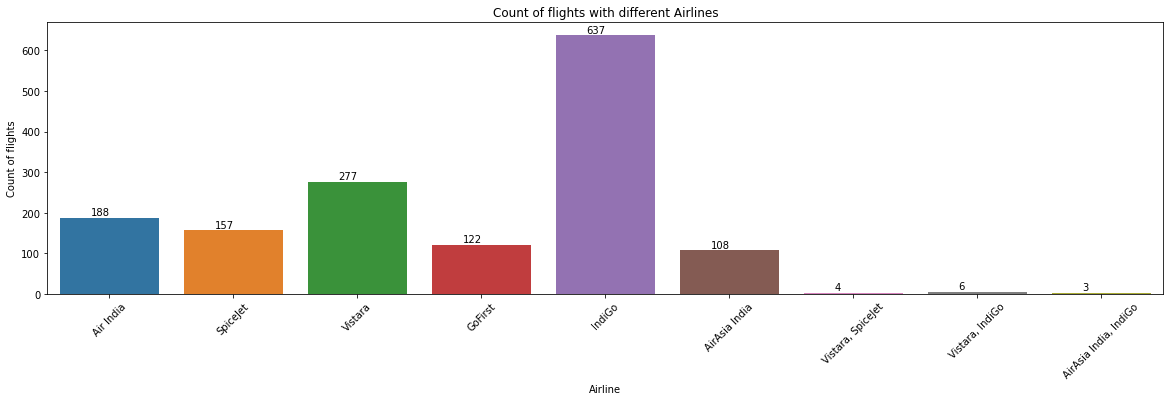

In [188]:
plt.figure(figsize = (20,5))
plt.title('Count of flights with different Airlines')
ax=sns.countplot(x = 'airline', data =df_flight)
plt.xlabel('Airline')
plt.ylabel('Count of flights')
plt.xticks(rotation = 45)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom', color= 'black')

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

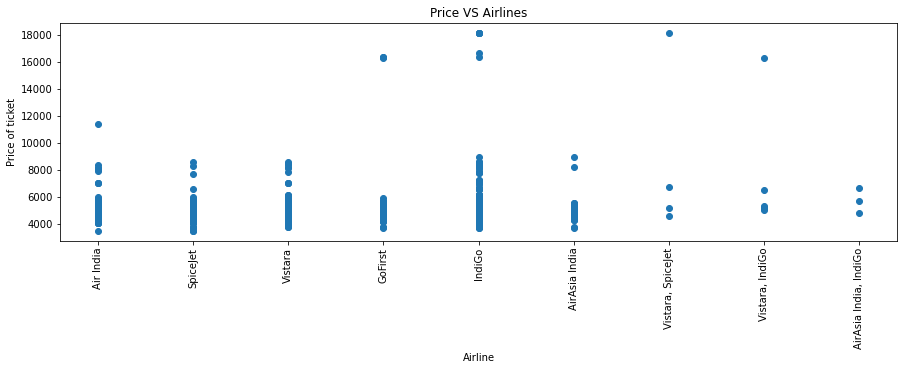

In [189]:
plt.figure(figsize = (15,4))
plt.title('Price VS Airlines')
plt.scatter(df_flight['airline'], df_flight['ticket1'])
plt.xticks
plt.xlabel('Airline')
plt.ylabel('Price of ticket')
plt.xticks(rotation = 90)

In [190]:
df_flight.columns

Index(['airline', 'departure_city', 'destination_city', 'stop', 'ticket1',
       'departure_hr', 'departure_min', 'reaching_hr', 'reaching_min',
       'total_journey'],
      dtype='object')

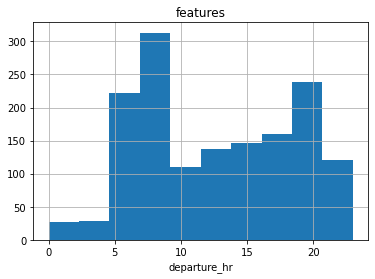

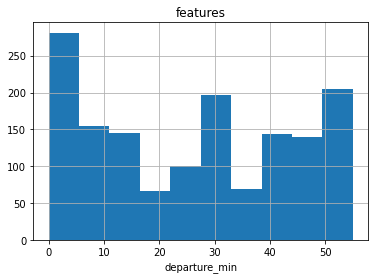

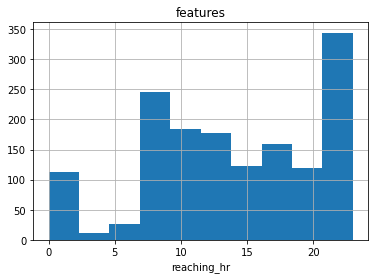

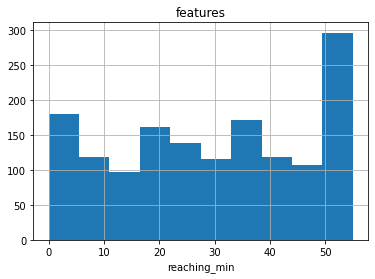

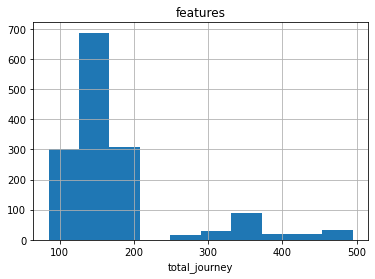

In [195]:
features=['departure_hr', 'departure_min', 'reaching_hr', 'reaching_min',
       'total_journey']
for feature in features:
    data=df_flight.copy()
    data[feature].hist()
    plt.xlabel(feature)
    plt.title('features')
    plt.show()

<AxesSubplot:xlabel='departure_hr', ylabel='ticket1'>

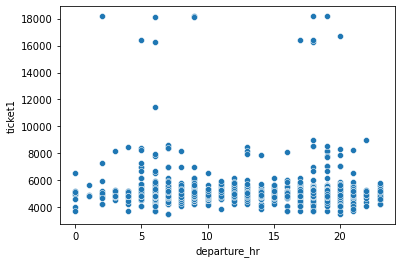

In [199]:
import seaborn
seaborn.scatterplot(x='departure_hr',y="ticket1", data=df_flight)

<AxesSubplot:xlabel='departure_hr', ylabel='ticket1'>

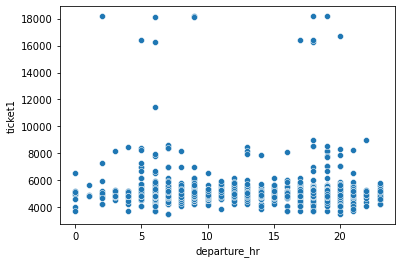

In [201]:
seaborn.scatterplot(x='departure_hr',y="ticket1", data=df_flight)

<AxesSubplot:xlabel='reaching_hr', ylabel='ticket1'>

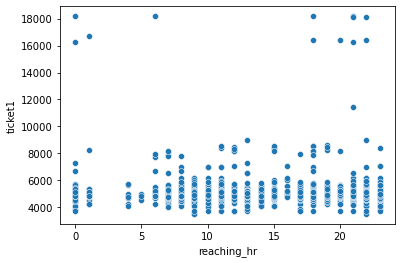

In [202]:
seaborn.scatterplot(x='reaching_hr',y="ticket1", data=df_flight)

<AxesSubplot:xlabel='total_journey', ylabel='ticket1'>

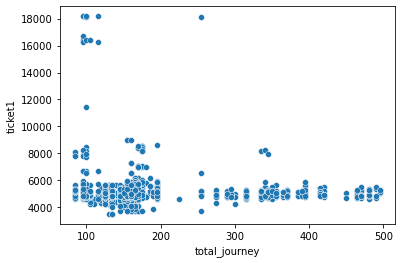

In [203]:
seaborn.scatterplot(x='total_journey',y="ticket1", data=df_flight)

In [205]:
df_flight.columns

Index(['airline', 'departure_city', 'destination_city', 'stop', 'ticket1',
       'departure_hr', 'departure_min', 'reaching_hr', 'reaching_min',
       'total_journey'],
      dtype='object')

In [208]:
le = LabelEncoder()
d1=le.fit_transform(df_flight['airline'])
d2=le.fit_transform(df_flight['departure_city'])
d3=le.fit_transform(df_flight['destination_city'])
d4=le.fit_transform(df_flight['stop'])

In [209]:
df_flight['airline']=d1
df_flight['departure_city']=d2
df_flight['destination_city']=d3
df_flight['stop']=d4


In [210]:
df_flight.head()

,airline,departure_city,destination_city,stop,ticket1,departure_hr,departure_min,reaching_hr,reaching_min,total_journey
0,0,1,5,1,4510,9,45,11,50,125
1,0,1,5,1,4625,9,45,11,50,125
2,5,1,5,1,4625,21,55,0,15,140
3,0,1,5,1,4510,7,10,9,25,135
4,6,1,5,1,4376,17,40,19,50,130


In [211]:
df_flight.describe()

,airline,departure_city,destination_city,stop,ticket1,departure_hr,departure_min,reaching_hr,reaching_min,total_journey
count,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000
mean,3.694407,0.996671,3.399467,0.875499,5168.707723,12.675100,26.198402,13.839547,29.523968,177.896138
std,1.889120,0.057620,2.416400,0.330262,1273.955996,5.779737,17.728106,6.455419,16.660473,81.949521
min,0.000000,0.000000,0.000000,0.000000,3498.000000,0.000000,0.000000,0.000000,0.000000,85.000000
25%,3.000000,1.000000,1.000000,1.000000,4799.000000,7.000000,10.000000,9.000000,15.000000,135.000000
50%,4.000000,1.000000,4.000000,1.000000,4976.000000,12.000000,30.000000,13.000000,30.000000,160.000000
75%,5.000000,1.000000,6.000000,1.000000,5175.000000,18.000000,40.000000,20.000000,45.000000,170.000000
max,8.000000,1.000000,7.000000,1.000000,18173.000000,23.000000,55.000000,23.000000,55.000000,495.000000


In [212]:
df_flight.corr()

,airline,departure_city,destination_city,stop,ticket1,departure_hr,departure_min,reaching_hr,reaching_min,total_journey
airline,1.000000,-0.009352,-0.040959,0.068185,0.030173,-0.027527,-0.003281,-0.038331,-0.016479,-0.052698
departure_city,-0.009352,1.000000,0.009557,-0.021794,0.001729,-0.033257,-0.009136,0.005728,-0.015532,0.037316
destination_city,-0.040959,0.009557,1.000000,-0.396789,-0.043366,0.072171,0.129875,0.151161,0.026240,0.583827
stop,0.068185,-0.021794,-0.396789,1.000000,0.014567,-0.089265,-0.008067,-0.004689,-0.024703,-0.665819
ticket1,0.030173,0.001729,-0.043366,0.014567,1.000000,-0.020855,0.004088,0.017045,-0.002594,-0.055587
departure_hr,-0.027527,-0.033257,0.072171,-0.089265,-0.020855,1.000000,0.014693,0.111506,-0.012816,0.019767
departure_min,-0.003281,-0.009136,0.129875,-0.008067,0.004088,0.014693,1.000000,0.056898,0.051444,0.037700
reaching_hr,-0.038331,0.005728,0.151161,-0.004689,0.017045,0.111506,0.056898,1.000000,-0.056957,0.075313
reaching_min,-0.016479,-0.015532,0.026240,-0.024703,-0.002594,-0.012816,0.051444,-0.056957,1.000000,-0.034318
total_journey,-0.052698,0.037316,0.583827,-0.665819,-0.055587,0.019767,0.037700,0.075313,-0.034318,1.000000


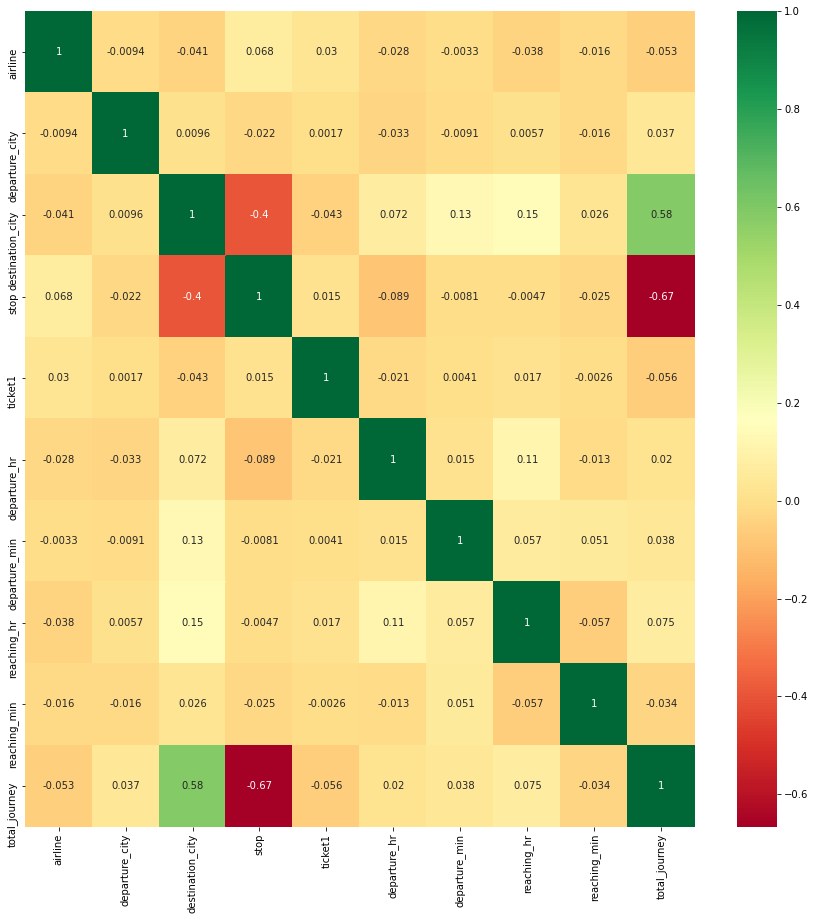

In [213]:
plt.figure(figsize = (15,15))
sns.heatmap(df_flight.corr(), annot = True, cmap = "RdYlGn")
plt.show()

In [217]:
x=df_flight.drop(columns='ticket1')
y=df_flight['ticket1']

In [218]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
x_scaled

array([[-1.95627434,  0.05779285,  0.66258316, ..., -0.44001681,
         1.22942794, -0.64568719],
       [-1.95627434,  0.05779285,  0.66258316, ..., -0.44001681,
         1.22942794, -0.64568719],
       [ 0.6913415 ,  0.05779285,  0.66258316, ..., -2.14457898,
        -0.87205237, -0.46258672],
       ...,
       [ 0.16181833,  0.05779285, -1.40730018, ..., -1.21481779,
        -0.27162942, -0.95085464],
       [ 2.279911  ,  0.05779285, -1.40730018, ..., -2.14457898,
        -1.17226384, -0.76775417],
       [ 0.16181833,  0.05779285, -1.40730018, ...,  1.10958517,
        -0.87205237,  0.94118355]])

In [219]:
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split

In [220]:
vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(x_scaled,i)
           for i in range(x_scaled.shape[1])]
vif["feature"]=x.columns
vif

,vif,feature
0,1.006905,airline
1,1.003105,departure_city
2,1.581341,destination_city
3,1.836844,stop
4,1.030430,departure_hr
5,1.023986,departure_min
6,1.046331,reaching_hr
7,1.015259,reaching_min
8,2.334919,total_journey


In [221]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=355)

In [230]:
import warnings
warnings.simplefilter("ignore")
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor

In [234]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(x_train, y_train)

RandomForestRegressor()

In [235]:
y_pred = reg_rf.predict(x_test)

In [236]:
reg_rf.score(x_train, y_train)

0.40480108909147783

In [237]:
reg_rf.score(x_test, y_test)

-0.05226492417003925

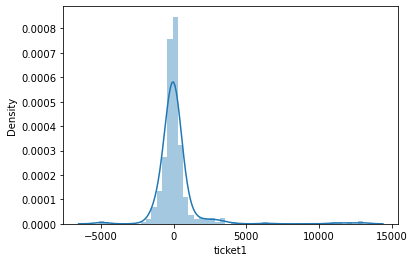

In [238]:
sns.distplot(y_test-y_pred)
plt.show()

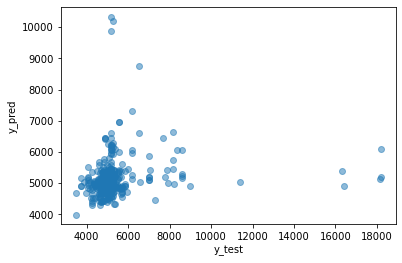

In [239]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [240]:
from sklearn import metrics

In [241]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 641.5618532330568
MSE: 2429609.123548533
RMSE: 1558.72034808959


In [243]:
from sklearn.model_selection import RandomizedSearchCV

In [244]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [245]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [246]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [247]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [248]:
rf_random.best_params_

{'n_estimators': 300,
 'min_samples_split': 100,
 'min_samples_leaf': 5,
 'max_features': 'auto',
 'max_depth': 15}

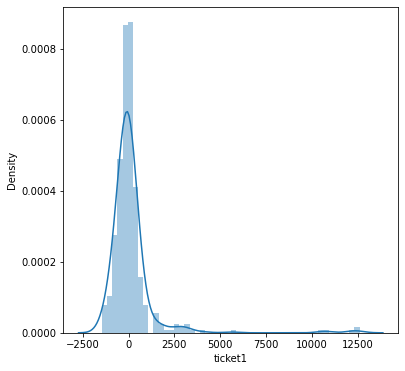

In [283]:
plt.figure(figsize = (6,6))
sns.distplot(y_test-prediction)
plt.show()

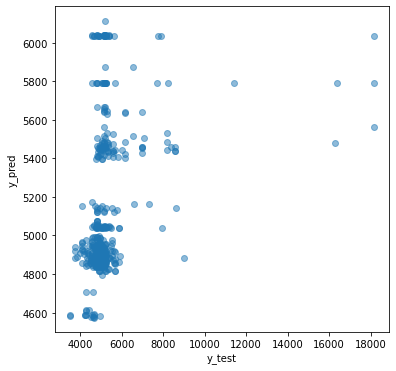

In [284]:
plt.figure(figsize = (6,6))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [253]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 588.1470448467032
MSE: 2099502.179858303
RMSE: 1448.9659001709817


In [282]:
#Saving the model as obj file
import pickle
file=open('flightPrice_project.pkl','wb')
pickle.dump(rf_random,file)